In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
#hyperparameters
# input_size = 784 # 28x28
input_size = 28
sequence_length = 28
num_layers = 2

hidden_size = 128
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms.ToTensor())


In [5]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle=True)

In [6]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


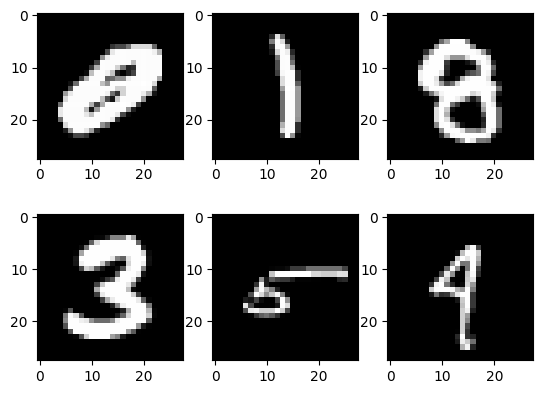

In [7]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0], cmap="gray")
plt.show()

In [9]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(RNN, self).__init__()
    self.num_layers = num_layers
    self.hidden_size = hidden_size
    self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first = True)
    #x -> batch_size, sequence_len, input_size
    self.fc = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

    out, _ = self.rnn(x, h0)
    #out: batch_size, seq_length, hidden_size
    # out: (N, 28, 128)
    out = out[:,-1,:]
    # out: (N, 128)
    out = self.fc(out)
    return  out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

#loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

#training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 28,28
    images = images.reshape(-1, sequence_length, input_size).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f"epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    # 100, 28,28
    images = images.reshape(-1, sequence_length, input_size).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions ==labels).sum().item()

  acc = 100.0* n_correct/n_samples
  print(f"accuracy = {acc}")


epoch 1/ 2, step 100/600, loss = 1.0425
epoch 1/ 2, step 200/600, loss = 0.8638
epoch 1/ 2, step 300/600, loss = 0.4804
epoch 1/ 2, step 400/600, loss = 0.6739
epoch 1/ 2, step 500/600, loss = 0.6740
epoch 1/ 2, step 600/600, loss = 0.4055
epoch 2/ 2, step 100/600, loss = 0.3940
epoch 2/ 2, step 200/600, loss = 0.3416
epoch 2/ 2, step 300/600, loss = 0.2779
epoch 2/ 2, step 400/600, loss = 0.3649
epoch 2/ 2, step 500/600, loss = 0.2624
epoch 2/ 2, step 600/600, loss = 0.2217
accuracy = 92.26


In [10]:
class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(GRU, self).__init__()
    self.num_layers = num_layers
    self.hidden_size = hidden_size
    self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first = True)
    #x -> batch_size, sequence_len, input_size
    self.fc = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

    out, _ = self.gru(x, h0)
    #out: batch_size, seq_length, hidden_size
    # out: (N, 28, 128)
    out = out[:,-1,:]
    # out: (N, 128)
    out = self.fc(out)
    return  out

model = GRU(input_size, hidden_size, num_layers, num_classes).to(device)

#loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

#training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 28,28
    images = images.reshape(-1, sequence_length, input_size).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f"epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    # 100, 28,28
    images = images.reshape(-1, sequence_length, input_size).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions ==labels).sum().item()

  acc = 100.0* n_correct/n_samples
  print(f"accuracy = {acc}")


epoch 1/ 2, step 100/600, loss = 0.7076
epoch 1/ 2, step 200/600, loss = 0.5112
epoch 1/ 2, step 300/600, loss = 0.3255
epoch 1/ 2, step 400/600, loss = 0.2383
epoch 1/ 2, step 500/600, loss = 0.1585
epoch 1/ 2, step 600/600, loss = 0.2357
epoch 2/ 2, step 100/600, loss = 0.1036
epoch 2/ 2, step 200/600, loss = 0.2093
epoch 2/ 2, step 300/600, loss = 0.0774
epoch 2/ 2, step 400/600, loss = 0.1635
epoch 2/ 2, step 500/600, loss = 0.0866
epoch 2/ 2, step 600/600, loss = 0.1308
accuracy = 97.29


In [11]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(LSTM, self).__init__()
    self.num_layers = num_layers
    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True)
    #x -> batch_size, sequence_len, input_size
    self.fc = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

    out, _ = self.lstm(x, (h0,c0))
    #out: batch_size, seq_length, hidden_size
    # out: (N, 28, 128)
    out = out[:,-1,:]
    # out: (N, 128)
    out = self.fc(out)
    return  out

model = LSTM(input_size, hidden_size, num_layers, num_classes).to(device)

#loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

#training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 28,28
    images = images.reshape(-1, sequence_length, input_size).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f"epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    # 100, 28,28
    images = images.reshape(-1, sequence_length, input_size).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions ==labels).sum().item()

  acc = 100.0* n_correct/n_samples
  print(f"accuracy = {acc}")


epoch 1/ 2, step 100/600, loss = 0.7327
epoch 1/ 2, step 200/600, loss = 0.5412
epoch 1/ 2, step 300/600, loss = 0.4145
epoch 1/ 2, step 400/600, loss = 0.2341
epoch 1/ 2, step 500/600, loss = 0.2192
epoch 1/ 2, step 600/600, loss = 0.0817
epoch 2/ 2, step 100/600, loss = 0.2038
epoch 2/ 2, step 200/600, loss = 0.1300
epoch 2/ 2, step 300/600, loss = 0.0346
epoch 2/ 2, step 400/600, loss = 0.1774
epoch 2/ 2, step 500/600, loss = 0.0983
epoch 2/ 2, step 600/600, loss = 0.0951
accuracy = 96.87
